# Credit Card Approval Prediction Model in Python

In [200]:
import os
from google_drive_downloader import GoogleDriveDownloader as gdd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import warnings
#warnings.filterwarnings("ignore")

## 1. Data Understanding

In [201]:
# Download data from Drive if not exist
if not os.path.exists('../data/CC_data.csv'):
    gdd.download_file_from_google_drive(file_id='185SYKXTNJlc2Mkd77kt-qNr81bsIx_1t',
                                    dest_path='../data/CC_data.csv',
                                    unzip=False)
else:
  print("Dataset exist.")

Dataset exist.


In [202]:

# Read the data file
CC_data = pd.read_csv("../data/CC_data.csv")
# Replace "?" with NaN
CC_data.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
CC_data["Age"] = pd.to_numeric(CC_data["Age"])
# CC_data2 = CC_data[:,:]
CC_data2 = CC_data.copy()
# View the first 10 records
CC_data.head(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+


In [203]:
# Print DataFrame information
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            678 non-null    object 
 1   Age             678 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


In [204]:
# Print some basic statistical details of numeric values (int64, float64).
CC_data.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [205]:
# Print the number of missing values ​​by columns
CC_data.isnull().sum()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

## 2. Data Preparation

In [206]:
# Imputing missing values for numerical columns with mean value
CC_data.fillna(CC_data.mean(), inplace=True)
CC_data.isnull().sum()

Male              12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

## 3. Data Description and Distribution

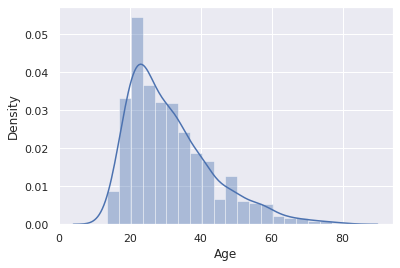

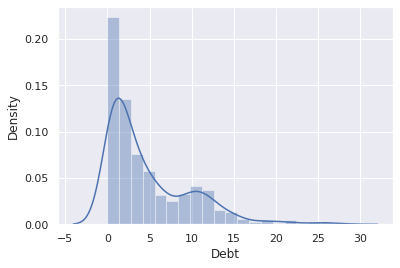

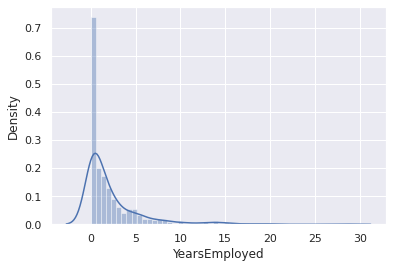

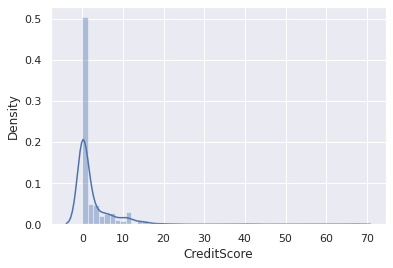

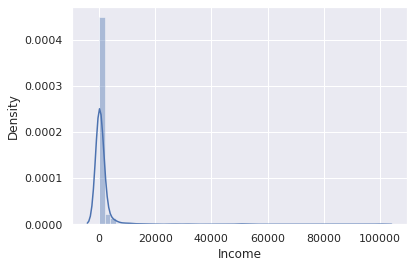

In [207]:
# Numerical variables distribution 
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(CC_data['Age'])
plotDistPlot(CC_data['Debt'])
plotDistPlot(CC_data['YearsEmployed'])
plotDistPlot(CC_data['CreditScore'])
plotDistPlot(CC_data['Income'])

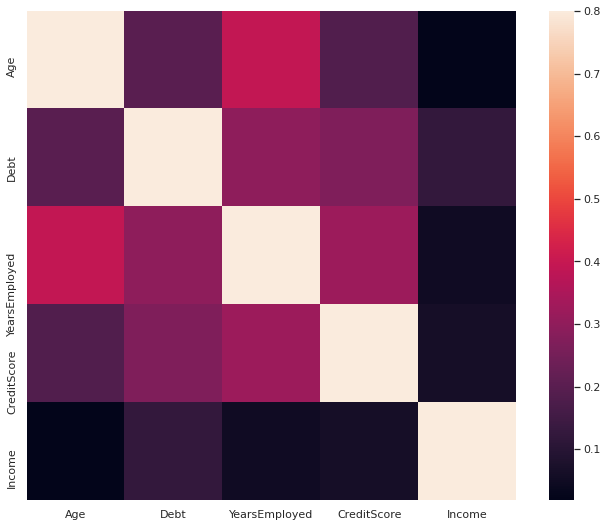

In [208]:
#correlation matrix
corrmat = CC_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

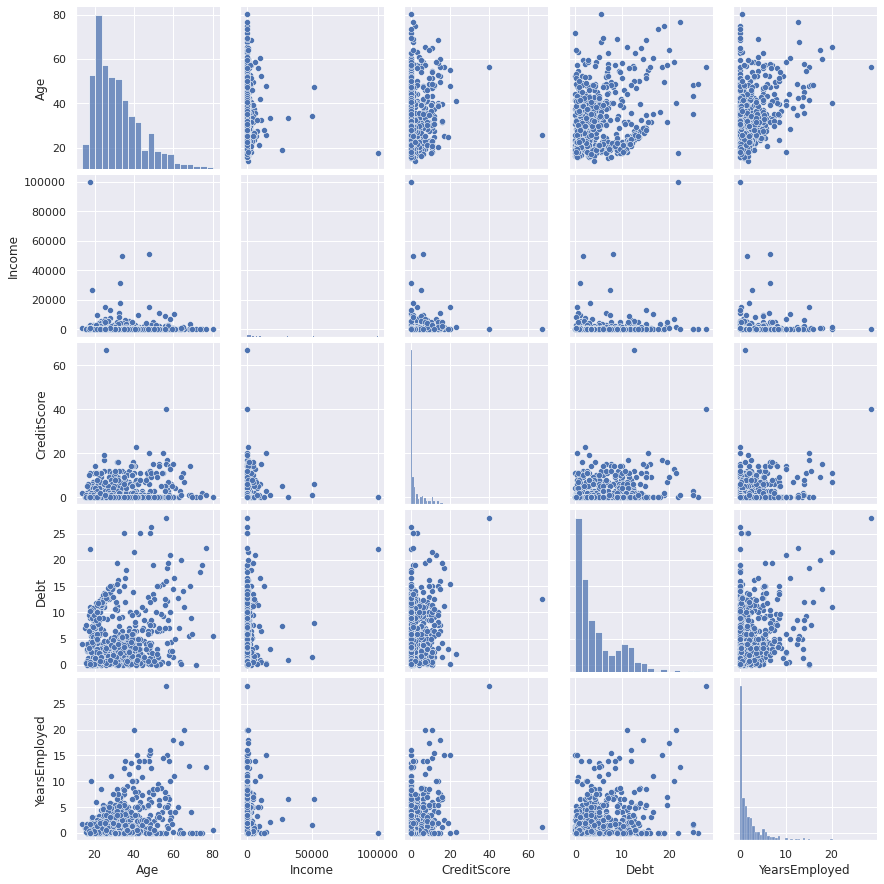

In [209]:
#scatterplot
sns.set()
cols = ['Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed']
sns.pairplot(CC_data[cols], size = 2.5)
plt.show()

<AxesSubplot:xlabel='Approved', ylabel='count'>

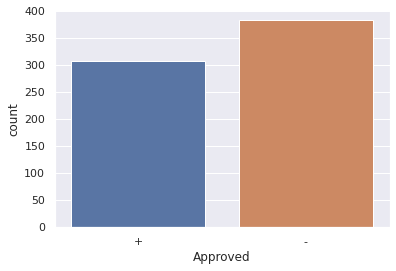

In [210]:
sns.countplot(data = CC_data, x = 'Approved')

In [211]:
CC_data.isnull().sum()

Male              12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [212]:
print("shape of the data:", CC_data.shape)

shape of the data: (690, 16)


In [213]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(CC_data)

In [214]:
CC_data.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [215]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Looping for each object type column
#Using label encoder to convert into numeric types
for col in CC_data:
    if CC_data[col].dtypes=='object':
        CC_data[col]=le.fit_transform(CC_data[col])

In [216]:
CC_data.tail(17)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
673,1,29.50,2.000,2,2,4,3,2.000,0,0,0,0,0,66,17,1
674,0,37.33,2.500,1,0,6,3,0.210,0,0,0,0,0,67,246,1
675,0,41.58,1.040,1,0,0,7,0.665,0,0,0,0,0,61,237,1
676,0,30.58,10.665,1,0,10,3,0.085,0,1,12,1,0,11,3,1
677,1,19.42,7.250,1,0,9,7,0.040,0,1,1,0,0,1,1,1
678,0,17.92,10.210,1,0,5,2,0.000,0,0,0,0,0,0,50,1
679,0,20.08,1.250,1,0,1,7,0.000,0,0,0,0,0,0,0,1
680,1,19.50,0.290,1,0,8,7,0.290,0,0,0,0,0,74,364,1
681,1,27.83,1.000,2,2,3,3,3.000,0,0,0,0,0,32,537,1
682,1,17.08,3.290,1,0,6,7,0.335,0,0,0,1,0,15,2,1


## 4. Data Modeling and Evaluation

In [217]:
from sklearn.model_selection import train_test_split
# Removing the feature which are not important and converting to NumPy array
CC_data = CC_data.drop(['DriversLicense', 'ZipCode'], axis=1)
CC_data = CC_data.values

In [218]:
# Creating new variable to input features and labels
X,y = CC_data[:,0:13] , CC_data[:,13]
#CC_data.to_numpy
#X,y = CC_data.iloc[:,CC_data.columns != 'Approved'] , CC_data["Approved"]

# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [219]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)
rescaledX = scaler.transform(X)

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)
# According to the Random Forest Classifier, PriorDefault is the most important feature, followed by Credit Score and Employment status.

Random Forest classifier has accuracy of:  0.8623188405797102


array([[47, 15],
       [ 4, 72]])

Feature ranking:
1. feature 8 (0.294281)
2. feature 10 (0.116436)
3. feature 7 (0.107456)
4. feature 2 (0.099678)
5. feature 12 (0.093568)
6. feature 1 (0.086956)
7. feature 5 (0.063017)
8. feature 9 (0.062807)
9. feature 6 (0.029213)
10. feature 0 (0.014510)
11. feature 3 (0.011040)
12. feature 11 (0.010833)
13. feature 4 (0.010203)


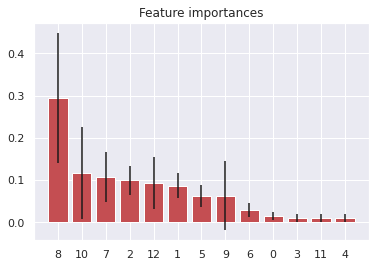

In [221]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## 5. Which attribute has played most important role in credit card request decision?

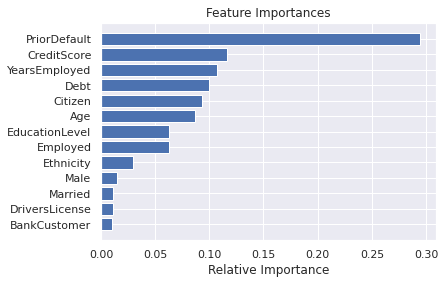

In [222]:
# copy of CC_data is in CC_data2
CC_data2 = CC_data2.drop(['Approved'], axis=1)

features = CC_data2.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [223]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Fitting logistic regression with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

In [224]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Using the trained model to predict instances from the test set
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of predictive model
print("Logistic regression classifier has accuracy of: ", logreg.score(rescaledX_test, Y_test))

# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)


Logistic regression classifier has accuracy of:  0.8695652173913043


array([[54,  8],
       [10, 66]])

In [225]:
y_probs = logreg.predict_proba(rescaledX)
y_class = logreg.predict(rescaledX)

In [226]:
y_probs = np.delete(y_probs, 0, 1)

In [61]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary
param_grid = dict(tol=tol, max_iter=max_iter)

In [62]:
# Initializing GridSearchCV
grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Rescaling the entire data set with all the predictive features
rescaledX = scaler.fit_transform(X)

# Calculating and summarizing the final results
grid_model_result = grid_model.fit(rescaledX, y)
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_ 
print("Best: %f using %s" %  (best_score, best_params))


Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}
